## With OHE and Scaling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df.head()

,Company,Memory_Structure_Categories,Gpu_Type,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,Asus,Hybrid,GeForce GTX 1080,Nvidia,Windows 10,Intel,17.3,2.9,32,512,4.7,4279
1,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.7,32,512,4.6,3564
2,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.7,16,256,4.6,3025
3,Lenovo,Hybrid,GeForce GTX 1070,Nvidia,Windows 10,Intel,17.3,2.7,32,256,4.6,2929
4,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.6,16,128,4.6,2519


In [3]:
df = df.drop(["Gpu_Type"], axis=1)

In [4]:
df

,Company,Memory_Structure_Categories,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,Asus,Hybrid,Nvidia,Windows 10,Intel,17.3,2.90,32,512,4.70,4279
1,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,512,4.60,3564
2,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,16,256,4.60,3025
3,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,256,4.60,2929
4,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...,...,...,...,...,...
1297,Samsung,SSD,Intel,Windows 10,Intel,13.3,2.50,8,256,0.81,1649
1298,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,711
1299,Lenovo,Flash,Intel,Android,Intel,10.1,1.44,4,64,0.69,604
1300,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,527


In [11]:
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df_2 = pd.get_dummies(df, columns=column_names_for_onehot)
X = df_2.drop(["Price_dollars"], axis=1)
y = df_2["Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(1302, 42) (1302,)


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6977709309159265


In [46]:
y_pred = model.predict(X_test_scaled)
result1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result1

,Actual,Predicted,pctDiff
1232,317,678.0,113.9
1030,2452,1438.0,41.4
163,1099,1250.0,13.7
1012,1216,1206.0,0.8
711,384,-140.0,136.5
...,...,...,...
34,1098,1554.0,41.5
85,886,638.0,28.0
978,703,1002.0,42.5
156,2299,1574.0,31.5


### notice the negative price values above.

#### "Linear regression does not respect the bounds of 0. It's linear, always and everywhere. It may not be appropriate for values that need to be close to 0 but are strictly positive." (https://stats.stackexchange.com/questions/145383/getting-negative-predicted-values-after-linear-regression)

In [49]:
result1[result1 < 0].count()

Actual       0
Predicted    3
pctDiff      0
dtype: int64

In [50]:
result1.pctDiff.mean()

33.43466257668712

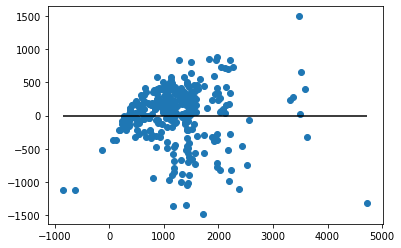

In [58]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

## with OHE but no scaling

In [52]:
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df_2 = pd.get_dummies(df, columns=column_names_for_onehot)
X = df_2.drop(["Price_dollars"], axis=1)
y = df_2["Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 42) (1302,)


In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7234799509010785


In [54]:
y_pred2 = model.predict(X_test)
result2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2, 'pctDiff': round(abs((y_pred2-y_test)*100/y_test),1)})
result2

,Actual,Predicted,pctDiff
1232,317,531.153640,67.6
1030,2452,1428.260408,41.8
163,1099,1262.143926,14.8
1012,1216,1048.179616,13.8
711,384,91.940561,76.1
...,...,...,...
34,1098,1552.958563,41.4
85,886,641.126418,27.6
978,703,922.901852,31.3
156,2299,1556.761187,32.3


In [61]:
result2[result2 < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [57]:
result2.pctDiff.mean()

29.607668711656437

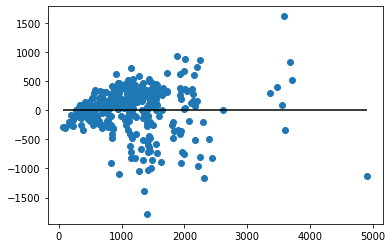

In [62]:
# Plot Residuals
plt.scatter(y_pred2, y_pred2 - y_test)
plt.hlines(y=0, xmin=y_pred2.min(), xmax=y_pred2.max())
plt.show()

## without OHE but with scaling

In [67]:
df_3 = df.drop(["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"], axis=1)

In [68]:
df_3

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,17.3,2.90,32,512,4.70,4279
1,17.3,2.70,32,512,4.60,3564
2,17.3,2.70,16,256,4.60,3025
3,17.3,2.70,32,256,4.60,2929
4,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,1649
1298,10.1,1.44,4,64,0.69,711
1299,10.1,1.44,4,64,0.69,604
1300,10.1,1.44,4,64,0.69,527


In [69]:
X = df_3.drop(["Price_dollars"], axis=1)
y = df_3["Price_dollars"]
print(X.shape, y.shape)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(1302, 5) (1302,)
(1302, 5) (1302,)


In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6397724832161193


In [ ]:
y_pred3 = model.predict(X_test)
result2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3, 'pctDiff': round(abs((y_pred3-y_test)*100/y_test),1)})
result2